[-0.30550525  1.30917276  1.83915649  0.91537711  0.64459054]


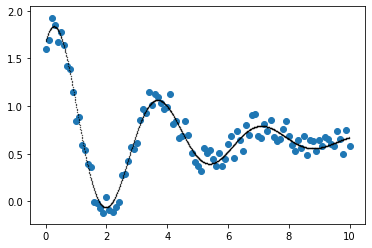

In [31]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

def f(x,vals):
    return (np.e**(vals[0]*x))*vals[1]*(np.sin(vals[2]*x+vals[3]))+vals[4]

def error(vals):
    a = np.loadtxt('xy_data.txt')
    x = [item[0] for item in a]
    y = [item[1] for item in a]

    N = len(a)
    errorsum = 0
    
    for i in range (0, N):
        errorsum += (y[i] - f(x[i],vals))**2
    return errorsum

error([0,0,0,0,0])

sol = differential_evolution(error, bounds = [(-1, 1), (-2, 2), (-2, 2), (-2, 2), (-1, 1)])
print(sol.x)


a = np.loadtxt('xy_data.txt')

x = [item[0] for item in a]
y = [item[1] for item in a]

plt.scatter(x, y)

xx = [i/100 for i in range (0, 1000)]
yy = []
for i in range (0, 1000):
    yy.append(f(xx[i],sol.x))

plt.scatter(xx,yy, c='black', s=0.1)

plt.show()